In [61]:
import cv2 
import numpy as np
import torch
import matplotlib.pyplot as plt
import sklearn
import sklearn.cluster

In [62]:
cap = cv2.VideoCapture("tests/finger_2024_11_18_20_27_50x.mp4")
cap.get(cv2.CAP_PROP_FRAME_COUNT)

343.0

In [63]:
# select the color collection point
n_clusters = 3
x,y,h,w = 0,0,50,50  # color display position
rx, ry, rh, rw = 600, 600, 10,10  # roi rectangle
color = (255,255,255)
thickness = 10
idx = 0
avg_colors = []


def setROI(event, x,y, flags, param):
    global rx,ry
    if event == cv2.EVENT_FLAG_LBUTTON:
        rx,ry = x,y
        
cv2.namedWindow("frame")
cv2.setMouseCallback("frame", setROI)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    
    imgRCrop = frame[ry:ry+rh, rx:rx+rw] # crop the rectangle
    
    meanColor = np.mean(imgRCrop, axis=(0,1))
    avg_colors.append(meanColor.tolist())
    
    imgR = cv2.rectangle(frame, (x,y), (x+w,y+h), meanColor, -1) # add recetancle for display
    
    imgR = cv2.rectangle(frame, (rx,ry),(rx+rw,ry+rh),color, 2) # roi rect
    
    cv2.imshow('frame',imgR) # show frame with rectangle
    
    if cv2.waitKey(25)==ord('q'):
        break
    
    idx+=1
    
    
cap.release()
cv2.destroyAllWindows()

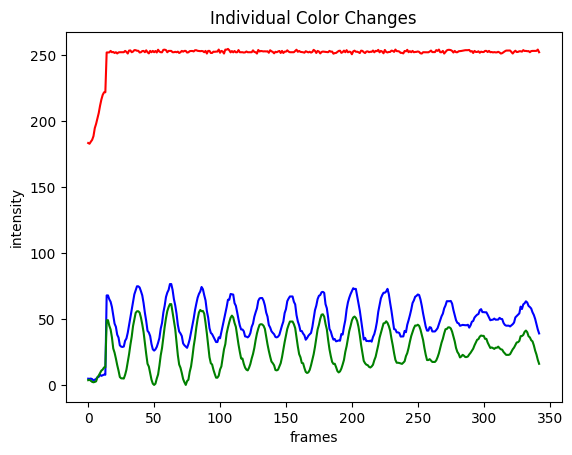

In [64]:
# plot individual color changes
line_colors = np.array(avg_colors)

x = np.arange(len(line_colors)) # for x axis length

fig, ax = plt.subplots()

ax.plot(x,line_colors[:,0], color="blue", label='blue')
ax.plot(x,line_colors[:,1], color="green", label='green')
ax.plot(x,line_colors[:,2], color="red", label='red')

plt.xlabel("frames")
plt.ylabel("intensity")
plt.title("Individual Color Changes")


plt.show()

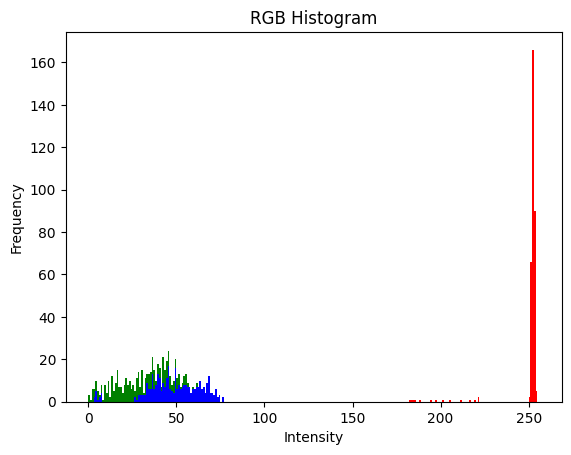

In [65]:
# plot frequency histogram
avgC_np = np.array(avg_colors)
avgC_np.reshape(-1,3)
fig,ax = plt.subplots()
ax.hist(avgC_np, bins=256, range=(0,256), color=['blue', 'green', 'red'], stacked=True)

ax.set_xlabel("Intensity")
ax.set_ylabel("Frequency")
ax.set_title("RGB Histogram")

plt.show()